In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
resumeData=pd.read_csv('resume_dataset.csv')
resumeData['strutured_resume']=''
resumeData

,Category,Resume,strutured_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [4]:
print("Displaying unique characters: ")
print(resumeData['Category'].unique())

Displaying unique characters: 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print("Displaying the unique categories of resume and number of records: ")
data=resumeData['Category'].value_counts()
print(data)

Displaying the unique categories of resume and number of records: 
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


Text(0.5, 1.0, 'Category vs Count')

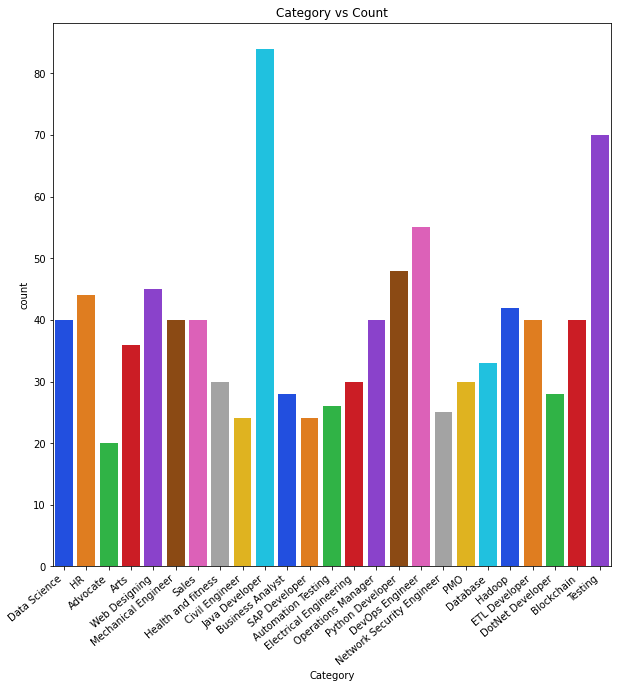

In [6]:
import seaborn as sns
plt.figure(figsize=(10,10))
categ=sns.countplot(x='Category',data=resumeData,palette='bright')
categ.set_xticklabels(categ.get_xticklabels(),rotation=40,ha="right")
plt.title("Category vs Count")

In [7]:
from matplotlib.gridspec import GridSpec
targetCount = resumeData['Category'].value_counts()
targetLabel=resumeData['Category'].unique()

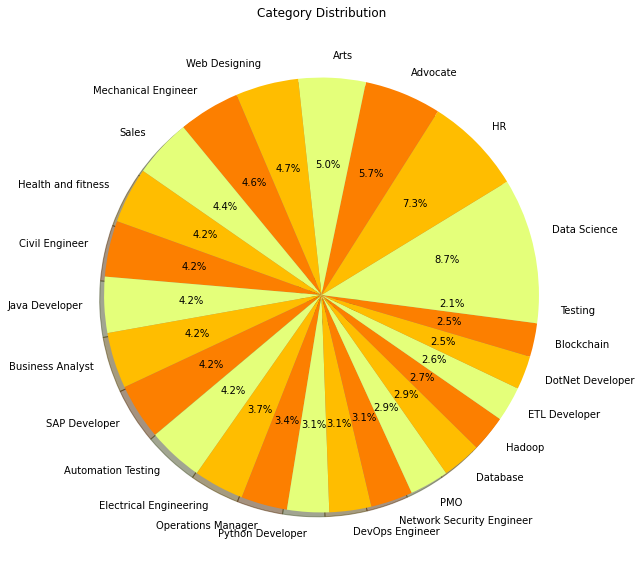

In [8]:
#Making the square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Wistia')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='Category Distribution')
source_pie = plt.pie(targetCount, labels=targetLabel, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [9]:
#importing re library
import re
#Function for cleaning Resume
def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs in the text
    Text = re.sub('@\S+', '  ', Text)  # remove mentions in the text
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  # remove punctuations in the text
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc in the text
    Text = re.sub('#\S+', '', Text)  # remove hashtags in the text
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace in the text
    return Text
    
resumeData['structured_resume'] = resumeData.Resume.apply(lambda x: clean_resume(x))

In [10]:
import nltk
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\RASHMI-
[nltk_data]     SAHOO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\RASHMI-
[nltk_data]     SAHOO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
#cleaning sentences
SetOf_StopWords = set(stopwords.words('english')+['``',"''"])
total_words=[]
sentences=resumeData['Resume'].values
cleanedSentence=""
for i in range(160):
    cleanedText=clean_resume(sentences[i])
    cleanedSentence += cleanedText
    requiredWords= nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOf_StopWords and word not in string.punctuation:
            total_words.append(word)


In [16]:

resumeData.shape

(962, 4)

In [17]:
wordfrequencydist=nltk.FreqDist(total_words)
mostCommon=wordfrequencydist.most_common(50)
print(mostCommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


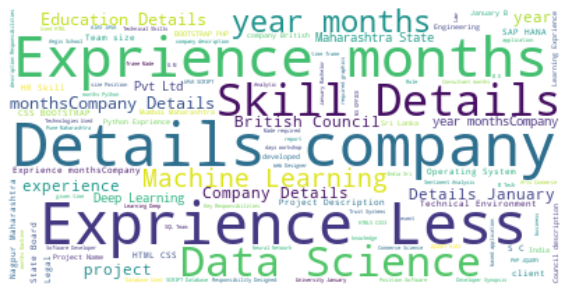

In [21]:
#plotting the frequency of words using Wordcloud library
word_cloud = WordCloud(background_color="white").generate(cleanedSentence)
plt.figure(figsize=(10,10))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
required_text=resumeData['structured_resume'].values
required_target=resumeData['Category'].values
word_vectorizer=TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(required_text)
wordfeatures=word_vectorizer.transform(required_text)
print("Feature completed")

Feature completed


In [25]:
X_train,X_test,y_train,y_test = train_test_split(wordfeatures,required_target,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [28]:
clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

print(metrics.classification_report(y_test, predict))

KNeighbors Classifier
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.99
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       0.83      1.00      0.91         5
             Data Science       1.00      1.00      1.00         9
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         9
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.90      1.00      0.95         9
                       HR       1.00    